<a href="https://colab.research.google.com/github/Cristiand056/practicas_IA/blob/main/CNN_Piedra_Papel_Tijeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tecnica simple para construir el dataset con nuevas imagenes

In [ ]:
pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.9 MB/s eta 0:00:00


# Desarrollo del modelo para CNN

## Preprocesamiento de los datos

[Dataset para usar como base del modelo](https://github.com/CodigoMaquina/code/blob/main/datos/piedra_papel_tijera.zip)

In [ ]:
#librerias
import tensorflow as tf
import numpy as np
from PIL import Image
import pathlib
import matplotlib.pyplot as plt
import random

In [ ]:
#cargar el dataset
url = 'https://github.com/CodigoMaquina/code/raw/main/datos/piedra_papel_tijera.zip'

In [ ]:
archivo = tf.keras.utils.get_file(origin=url,archive_format='zip', extract=True)

1100593/1100593 [==============================] - 0s 0us/step


In [ ]:
ruta=str(pathlib.Path(archivo)).replace('.zip','')
print(ruta)

/root/.keras/datasets/piedra_papel_tijera


In [ ]:
#descripcion de clases y su indentificador
descripcion=('papel', 'piedra', 'tijera')
clases={'papel':0,'piedra':1,'tijera':2}

#numero de imagenes por clase
num_img_clase=700

#imagenes de entrenamiento 80% -> 560
num_entrena=round(num_img_clase*0.80)
#print(num_entrena)

#imagenes de prueba 20% -> 140
num_prueba=round(num_img_clase*0.20)
#print(num_prueba)


In [ ]:
#creacion de los arreglos para almacenar los datos de entrenamiento para las 3 clases
#las imagenes son 30 de ancho y 20 alto
imagenes_entrena=np.empty((num_entrena*len(clases),20,30),dtype='uint8')
clases_entrena=np.empty(num_entrena * len(clases), dtype='uint8')

In [ ]:
#creacion de los arreglos para almacenar los datos de prueba para las 3 clases
#las imagenes son 30 de ancho y 20 alto
imagenes_prueba=np.empty((num_prueba*len(clases),20,30),dtype='uint8')
clases_prueba=np.empty(num_prueba * len(clases), dtype='uint8')

In [ ]:
#cargar los datos de entrenamiento y prueba
#tf.keras.utils.image_dataset_from_directory(ruta,image_size=(20,30))

#cargar todo el conjunto de datos para entrenamiento de las imagenes de cada clase del 0 hasta 559
for i in range(num_entrena):
  for clase in clases:
    imagen=Image.open(ruta+'/'+clase+'/'+str(i)+'.png')
    indice_instancia=i+clases[clase] * num_entrena
    imagenes_entrena[indice_instancia]=np.array(imagen)
    clases_entrena[indice_instancia]=clases[clase]

#cargar todo el conjunto de datos para prueba de las imagenes de cada clase del 560 hasta 699
for j in range(num_entrena, num_img_clase):
  for clase in clases:
    imagen=Image.open(ruta+'/'+clase+'/'+str(j)+'.png')
    indice_instancia=j+clases[clase] * num_prueba - num_entrena
    imagenes_prueba[indice_instancia]=np.array(imagen)
    clases_prueba[indice_instancia]=clases[clase]

##Normalizar - Escalar

In [ ]:
imagenes_entrena=imagenes_entrena/255
imagenes_prueba=imagenes_prueba/255

## Entrenamiento del modelo

### Creando el modelo de la red neuronal artificial (MLP)

In [ ]:
modelo= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20,30)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

### Compilar el modelo para entrenamiento

In [ ]:
modelo.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

### Ajuste del modelo

In [ ]:
modelo.fit(imagenes_entrena, clases_entrena, epochs=50)

Epoch 1/50
53/53 [==============================] - 1s 2ms/step - loss: 1.0729 - accuracy: 0.4357
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.9520 - accuracy: 0.5631
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.9108 - accuracy: 0.6012
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 0.8276 - accuracy: 0.6554
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 0.7852 - accuracy: 0.6810
Epoch 6/50
53/53 [==============================] - 0s 2ms/step - loss: 0.7231 - accuracy: 0.7190
Epoch 7/50
53/53 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.7274
Epoch 8/50
53/53 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.7185
Epoch 9/50
53/53 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.7423
Epoch 10/50
53/53 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.7637
Epoch 11/50
53/53 [

## Evaluacion del modelo

In [ ]:
predicciones = modelo.predict(imagenes_prueba)

14/14 [==============================] - 0s 1ms/step


In [ ]:
perdida,precision = modelo.evaluate(imagenes_prueba, clases_prueba)
print('Precision del modelo: ',precision)

14/14 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8524
Precision del modelo:  0.8523809313774109


## Ejemplo de Prueba del modelo

In [ ]:
#crecion de arreglo para almacenar todas las predicciones
clase_predicha=np.empty(num_prueba*len(clases), dtype='uint8')

for instancia in range(num_prueba*len(clases)):
  #almacena clase predicha para cada imagen dada
  clase_predicha[instancia]=np.argmax(predicciones[instancia])
  if clase_predicha[instancia] == clases_prueba[instancia]:
    print('% Probabilidades: ',predicciones[instancia],
          'Clase predicha: ',clase_predicha[instancia],
          'Clase correcta: ',clases_prueba[instancia],
          'La red Neuronal esta poderosa :D')
  else:
    print('% Probabilidades: ',predicciones[instancia],
          'Clase predicha: ',clase_predicha[instancia],
          'Clase correcta: ',clases_prueba[instancia],
          'La red Neuronal esta barro :(')

% Probabilidades:  [0.96302396 0.00379017 0.03318591] Clase predicha:  0 Clase correcta:  0 La red Neuronal esta poderosa :D
% Probabilidades:  [0.88915116 0.10605516 0.00479363] Clase predicha:  0 Clase correcta:  0 La red Neuronal esta poderosa :D
% Probabilidades:  [0.9895051  0.0076006  0.00289425] Clase predicha:  0 Clase correcta:  0 La red Neuronal esta poderosa :D
% Probabilidades:  [0.8067121  0.11949391 0.07379401] Clase predicha:  0 Clase correcta:  0 La red Neuronal esta poderosa :D
% Probabilidades:  [0.43296418 0.02293465 0.5441012 ] Clase predicha:  2 Clase correcta:  0 La red Neuronal esta barro :(
% Probabilidades:  [0.02617705 0.03029782 0.94352514] Clase predicha:  2 Clase correcta:  0 La red Neuronal esta barro :(
% Probabilidades:  [9.9360585e-01 5.7495399e-03 6.4453110e-04] Clase predicha:  0 Clase correcta:  0 La red Neuronal esta poderosa :D
% Probabilidades:  [0.6126074  0.3841876  0.00320502] Clase predicha:  0 Clase correcta:  0 La red Neuronal esta poderosa 

## Matriz de confusion para evaluar el rendimiento del modelo

### {'papel':0,'piedra':1,'tijera':2}

In [ ]:
matriz=tf.math.confusion_matrix(clases_prueba, clase_predicha)
print('Matriz de confusion: \n', matriz.numpy())

Matriz de confusion: 
 [[120   8  12]
 [ 13 119   8]
 [ 15   6 119]]


#Actividad practica


1.   Ingresar una o mas imagenes externas al modelo procesadas (>=3 imagenes)
2.   Modelo debe predecir a que categoria corresponde la imagen ingresada
3. Modelo debe generar de su dataset una imagen con su clase correspondiente
4. Comparar ambas etiquetas de las imagenes
5. Decidir quien es el ganador con base a las reglas de piedra, papel o tijera.



##Importar nuestras imagenes

In [ ]:
from rembg import remove

In [ ]:
imagen=Image.open("/content/papel.jpg")
imagen=remove(imagen) #remover fondo unicolor
imagen=imagen.resize((30,20)) #redimensionar la imagen a 30x20px
imagen=imagen.convert('L') #convertir a grises
imagen.save("papel_ext.png")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 112GB/s]


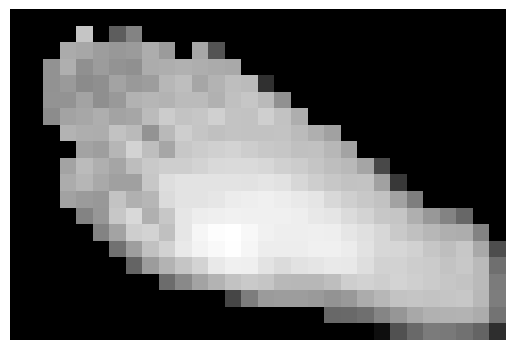

In [ ]:
#visualizacion de la imagen procesada de papel
imagen=Image.open("/content/papel_ext.png")
plt.imshow(imagen,cmap='gray')
plt.axis('off')
plt.show()



---



In [ ]:
imagen=Image.open("/content/piedra.jpg")
imagen=remove(imagen) #remover fondo unicolor
imagen=imagen.resize((30,20)) #redimensionar la imagen a 30x20px
imagen=imagen.convert('L') #convertir a grises
imagen.save("piedra_ext.png")

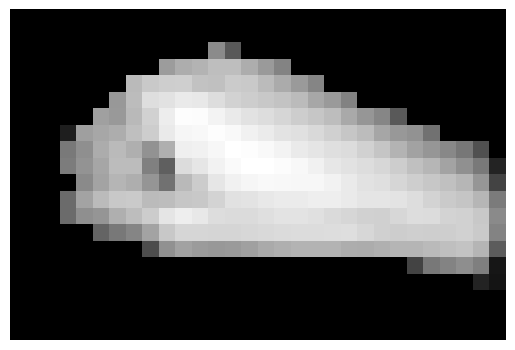

In [ ]:
#visualizacion de la imagen procesada de piedra
imagen=Image.open("/content/piedra_ext.png")
plt.imshow(imagen,cmap='gray')
plt.axis('off')
plt.show()



---



In [ ]:
imagen=Image.open("/content/tijera.jpg")
imagen=remove(imagen) #remover fondo unicolor
imagen=imagen.resize((30,20)) #redimensionar la imagen a 30x20px
imagen=imagen.convert('L') #convertir a grises
imagen.save("tijera_ext.png")

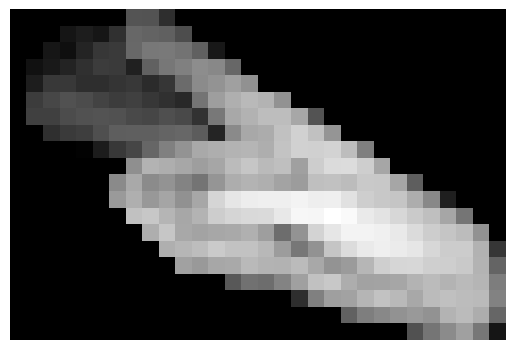

In [ ]:
#visualizacion de la imagen procesada de tijera
imagen=Image.open("/content/tijera_ext.png")
plt.imshow(imagen,cmap='gray')
plt.axis('off')
plt.show()



---



## Ajustes para la prediccion de las categorias de las imagenes externas

In [ ]:
imagen_externa=Image.open("/content/piedra_ext.png").resize((30,20))
imagen_externa_array=np.array(imagen_externa)/255

#asegurarnos que nuestra imagen tiene la forma correcta
imagen_externa_array = np.expand_dims(imagen_externa_array, axis=0)

#prediccion_externa=modelo.predict(imagen_externa_array.reshape(1,20,30))
prediccion_externa=modelo.predict(imagen_externa_array)
clase_predicha_externa=np.argmax(prediccion_externa)

1/1 [==============================] - 0s 84ms/step


In [ ]:
print('clase predicha de la imagen ingresada: ',clase_predicha_externa)

clase predicha de la imagen ingresada:  2


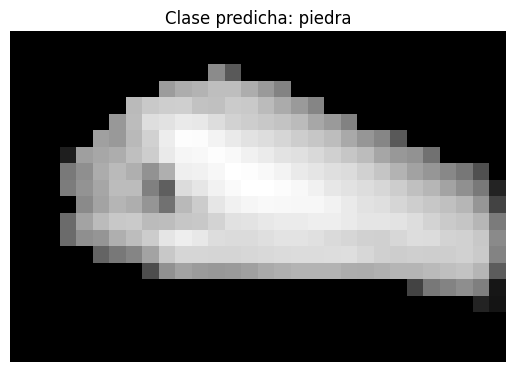

In [ ]:
#Visualizar la imagen externa
plt.imshow(np.squeeze(imagen_externa_array),cmap='gray')
plt.title(f'Clase predicha: {descripcion[clase_predicha_externa]}')
plt.axis('off')
plt.show()

## Escogencia de una imagen aleatoria del dataset de prueba por parte del modelo

In [ ]:
print(len(imagenes_prueba))

420


In [ ]:
#seleccionar una imagen aleatoria
indice_aleatorio=random.randint(0,len(imagenes_prueba)-1)
print(indice_aleatorio)
imagen_seleccionada=imagenes_prueba[indice_aleatorio]
clase_real=clases_prueba[indice_aleatorio]

prediccion=modelo.predict(np.expand_dims(imagen_seleccionada, axis=0))
clase_predicha=np.argmax(prediccion)

60
1/1 [==============================] - 0s 32ms/step


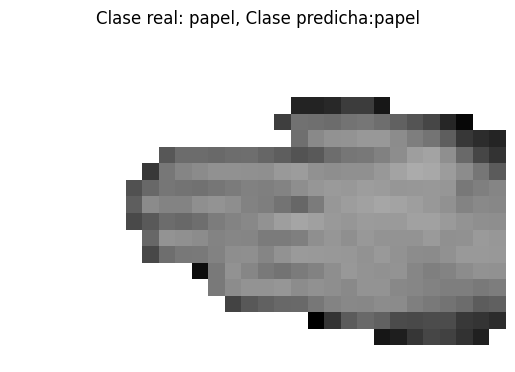

In [ ]:
plt.imshow(imagen_seleccionada,cmap='gray')
plt.title(f'Clase real: {descripcion[clase_real]}, Clase predicha:{descripcion[clase_predicha]}')
plt.axis('off')
plt.show()

##Crear las reglas para el juego piedra, papel, tijera

In [ ]:
def evaluar_juego(clase1,clase2):
  if clase1==clase2:
    return 'Empate'
  elif (clase1==0 and clase2==1) or (clase1==1 and clase2==2) or (clase1==2 and clase2==0):
    return 'IA Gana'
  else:
    return 'Jugador Gana'

In [ ]:
resultado=evaluar_juego(clase_predicha,clase_predicha_externa)
#mostrar los resultados
print(f'Eleccion de la IA: {descripcion[clase_predicha]}')
print(f'Eleccion del Jugador: {descripcion[clase_predicha_externa]}')
print(f'Resultado del juego: {resultado}')

Eleccion de la IA: papel
Eleccion del Jugador: piedra
Resultado del juego: IA Gana
